# Case Study on Correlation and Regression


A textile company regularly spent money on five advertising companies for their 
ads. (Dataset added along with)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Add_sales_data_2018.csv")
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [3]:
data.shape

(205, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [5]:
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [6]:
data["Profit(in Thousands)"].nunique()

205

In [7]:
data.dtypes

Date                     object
Add1(in Thousands)      float64
Add2(in Thousands)      float64
Add3(in Thousands)      float64
Add4(in Thousands)      float64
Add5(in Thousands)      float64
Profit(in Thousands)    float64
dtype: object

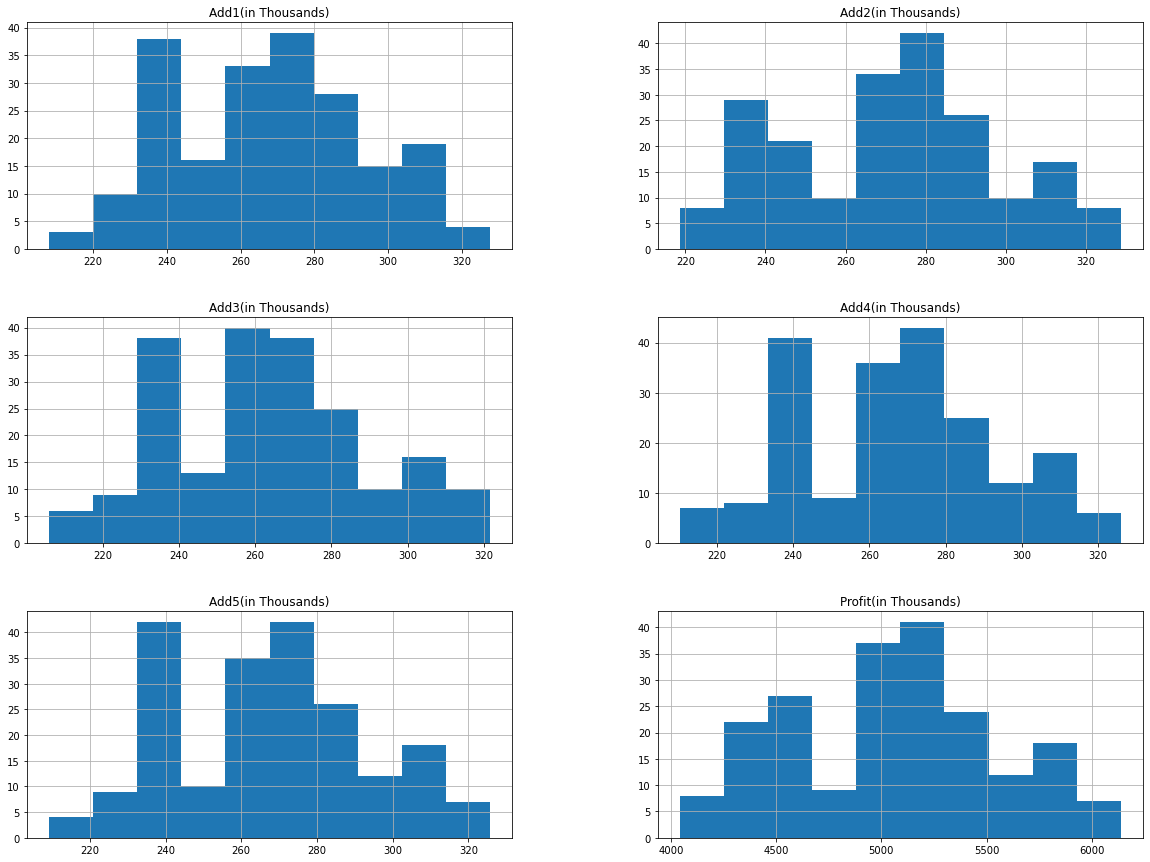

In [8]:
fregraph = data.select_dtypes(include=["float"])
fregraph.hist(figsize=(20,15))
plt.show()

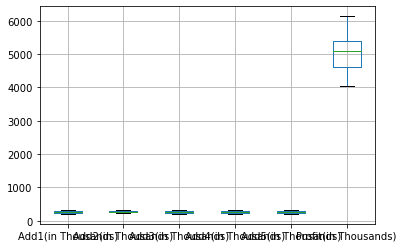

In [9]:
data.boxplot()
plt.show()

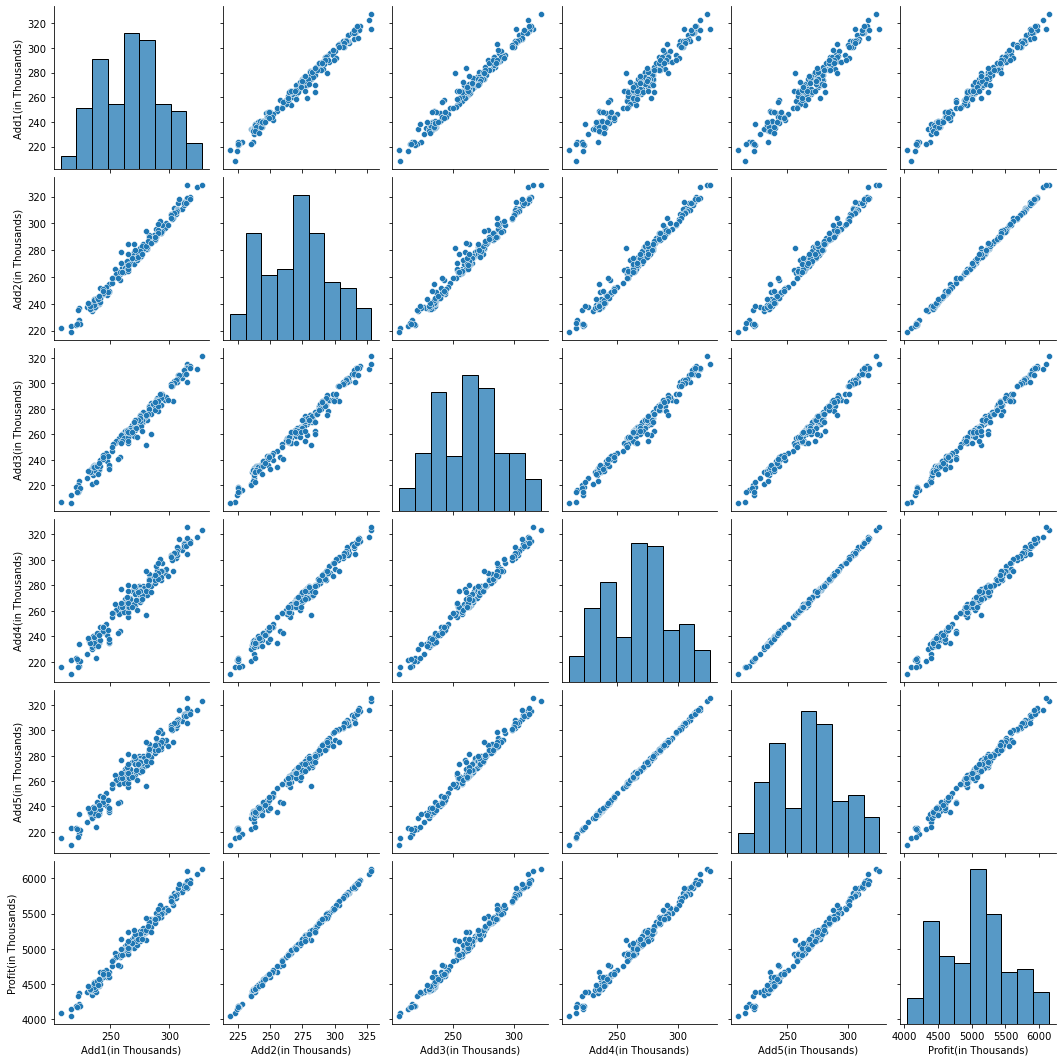

In [10]:
sns.pairplot(data)
plt.show()

No outlier for all the variables in the dataset.All variables are highly correlated and normally distributed

In [11]:
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


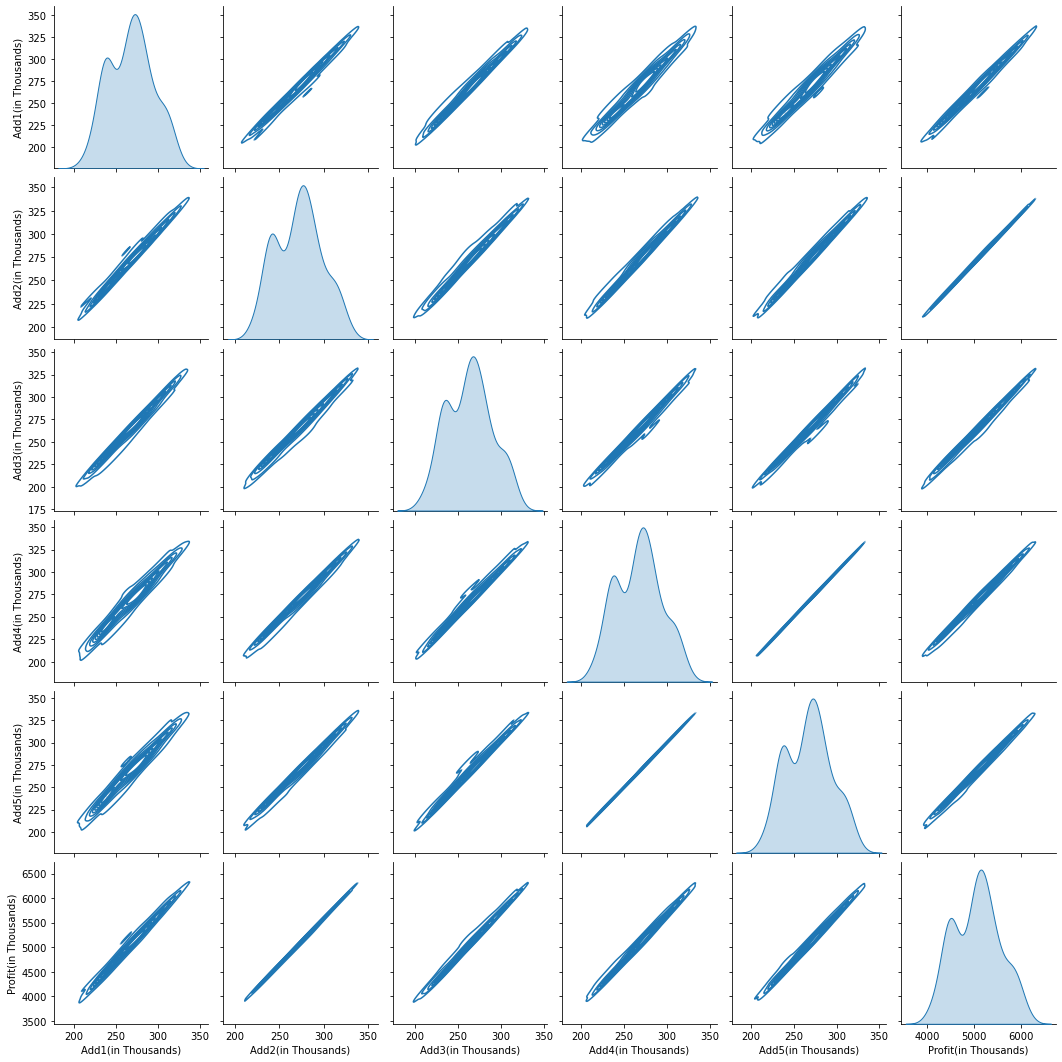

In [15]:
sns.pairplot(data, kind="kde")
plt.show()

1. First of all, check whether there is any relationship between the amount 
spent for advertising through five different companies and profit 
generated.


<AxesSubplot:>

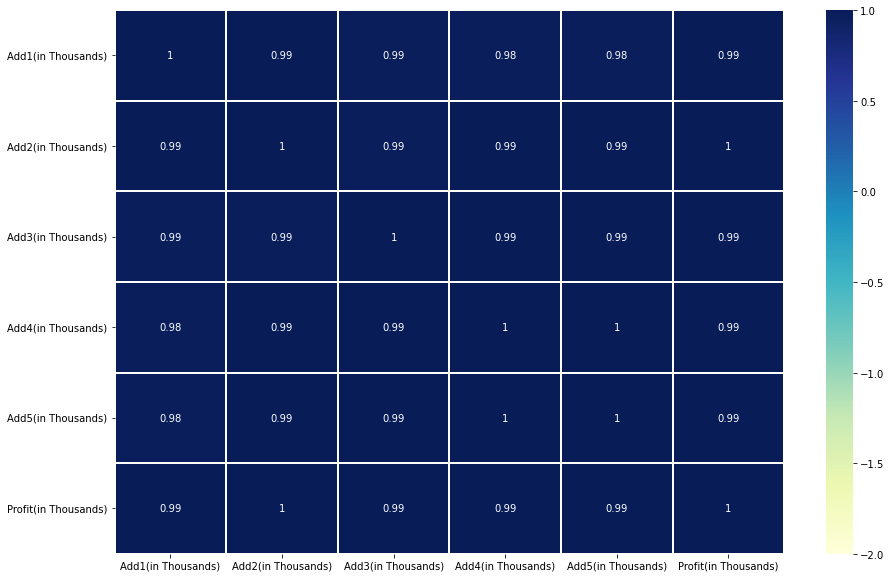

In [16]:
corrmatrix =data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corrmatrix,vmin=-2,vmax=1,annot=True,linewidth=.2,cmap='YlGnBu')

All variables are highly correlated

2. Build a regression model to predict the profit from the given data and 
comment your findings on it.


In [17]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [18]:
data1 = data.drop(['Add4(in Thousands)',"Date"],axis=1)

In [19]:
data1.columns

Index(['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)',
       'Add5(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

In [20]:
y=data1["Profit(in Thousands)"]
x=data1.drop(["Profit(in Thousands)"],axis=1)

In [21]:
x.shape

(205, 4)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=42,test_size=0.25)


In [23]:
from sklearn import linear_model

In [24]:
lr=linear_model.LinearRegression()

In [25]:
model=lr.fit(x_train,y_train)

In [26]:
predictions=model.predict(x_test)

In [27]:
print(y_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64


In [28]:
print(predictions)

[4153.2818461  4445.71740853 5130.40796973 4906.50501468 5006.82541736
 4623.35932117 5384.57472057 5328.09443997 5174.24658393 5956.1665879
 5780.67583526 4998.63516679 5075.71943506 5783.16863071 4936.48878199
 5065.32451176 4190.86807497 5034.91448533 5013.72184751 5134.46264443
 5145.26899938 5422.49401202 4569.02583391 4597.91098638 4436.70089824
 4175.21159561 5616.18272777 5667.26166773 4648.94682499 5717.83356248
 5000.53038317 5182.27013601 5017.70581515 5545.23999615 5013.74154448
 5033.29021927 5108.65226131 4760.01597517 4604.87740278 4925.60547473
 5252.35396509 5038.53361181 5491.86800825 5019.16609419 4646.96844429
 4486.3807748  4433.99207865 5300.48558185 5425.32966516 4482.14603852
 4193.23839733 6061.20029357]


In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
print('MSE is : ',mean_squared_error(y_test,predictions))

MSE is :  0.759113486985336


3. Predict the profit generated by the company, if they wish to spend the 
following amount for advertisement.

In [31]:
data2 =pd.read_csv(r"C:\Users\abhil\OneDrive\Documents\correlation.csv")
data2

,add,Add(in Thousands),Profit(in Thousands)
0,Add1(in Thousands),290,0
1,Add2(in Thousands),312,0
2,Add3(in Thousands),309,0
3,Add4(in Thousands),298,0
4,Add5(in Thousands),320,0


<AxesSubplot:>

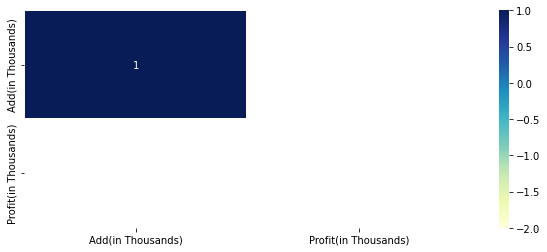

In [32]:
corrmatrix =data2.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,vmin=-2,vmax=1,annot=True,linewidth=.2,cmap='YlGnBu')

In [33]:
y=data2["Profit(in Thousands)"]
x=data2.drop(["Profit(in Thousands)","add"],axis=1)

In [34]:
x.shape

(5, 1)

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=42,test_size=.25)


In [36]:
from sklearn import linear_model

In [37]:
lr=linear_model.LinearRegression()

In [38]:
model=lr.fit(x_train,y_train)

In [39]:
predictions=model.predict(x_test)

In [40]:
print(y_test)

1    0
4    0
Name: Profit(in Thousands), dtype: int64


In [41]:
print(predictions)

[0. 0.]


In [42]:
from sklearn.metrics import mean_squared_error

In [43]:
print('MSE is : ',mean_squared_error(y_test,predictions))

MSE is :  0.0
